# 18.06 Problem Set 7

Due 11am Friday October 28.

## Problem 1 (5+5+5 points)

**(a)** Consider the $m \times n$ matrix

$$
A = \begin{pmatrix}
        1 & a_1 & a_1^2 & \cdots a_1^{n-1} \\
        1 & a_2 & a_2^2 & \cdots a_2^{n-1} \\
        1 & a_3 & a_3^2 & \cdots a_3^{n-1} \\
        \vdots & \vdots & \vdots & \vdots \\
        1 & a_m & a_m^2 & \cdots a_m^{n-1} \\
    \end{pmatrix}
$$

that we used in class for least-square fitting to polynomials, where $a$ will be a vector of $m$ equally spaced -points from $0$ to $1$.   This is computed in Julia by:
```
a = range(0, 1, length=m)
A = a .^ (0:n-1)'
```
Construct this matrix $A$ for $m = n = 100$, and plot its singular values `svdvals(A)` on a log scale with `using PyPlot, LinearAlgebra; semilogy(svdvals(A)); ylabel(L"\sigma_k"); title("...")` (always label your plots!).

You should observe that the singular values are rapidly decreasing - you could set all but about \_\_\_\_\_\_\_\_\_\_ of them (nearest multiple of 10) and still have nearly the same matrix $A$ to $\sim 16$ decimals places - the matrix $A$ is *nearly* rank \_\_\_\_\_\_\_\_\_\_ (nearest multiple of 10).

This means that many of the columns of $A$ are nearly linearly **dependent**.  Give a few words of explanation?

**(b)** Suppose that $A$ is an $m \times m$ matrix with $m$ *identical* singular values $\sigma_k = \sigma > 0$.  It follows that $A/\sigma$ must be a \_\_\_\_\_\_\_\_\_\_ (pick *one* of: singular, rank-deficient, projection, unitary, symmetric, uninteresting, diagonal, upper-triangular) matrix because \_\_\_\_\_\_\_\_\_\_.

**(c)** Plot the singular values of the matrix `A = rand(100,100)`, whose entries are random numbers distributed uniformly between 0 and 1.   This matrix is *not* close to rank-deficient, because random columns are very unlikely to be close to linearly dependent, so you should find that none of the singular values are ridiculously small compared to the others.   However, *one* singular value is much bigger that the others.  Why?  As a hint, plot the first 5 singular vectors $v$ with `plot(svd(A).V[:,1:5])` - how is the singular vector for the biggest singular value different from the others?  Maybe think about the best rank-1 approximation to this matrix implied by the SVD.  (A few words of explanation suffice, no proofs required.)

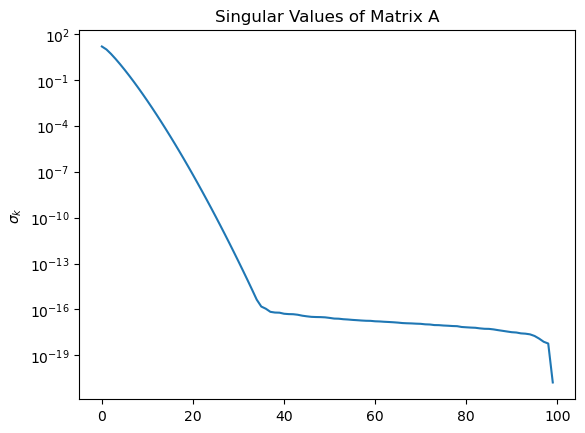

PyObject Text(0.5, 1.0, 'Singular Values of Matrix A')

In [13]:
# part a
using PyPlot
using LinearAlgebra

n = 100
m = 100

a = range(0, 1, length=m)
A = a.^ (0:n-1)'
semilogy(svdvals(A))
ylabel(L"\sigma_k")
title("Singular Values of Matrix A")

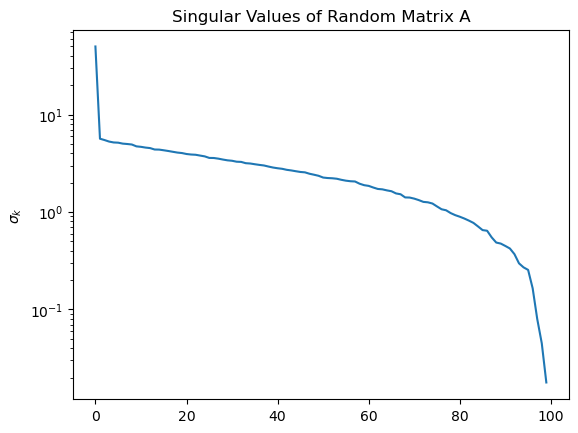

PyObject Text(0.5, 1.0, 'Singular Values of Random Matrix A')

In [14]:
# part c
A = rand(100, 100)
semilogy(svdvals(A))
ylabel(L"\sigma_k")
title("Singular Values of Random Matrix A")

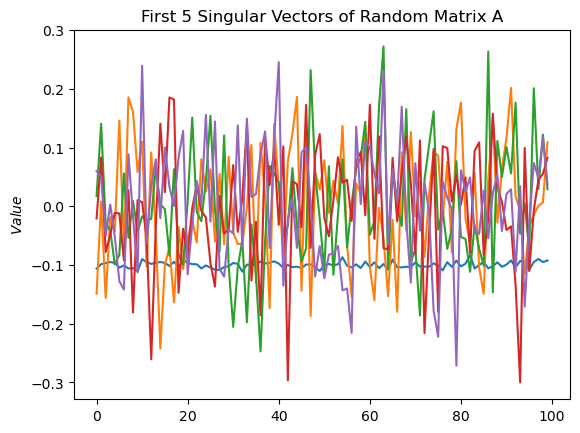

PyObject Text(0.5, 1.0, 'First 5 Singular Vectors of Random Matrix A')

In [16]:
# part c, continued
plot(svd(A).V[:,1:5])
ylabel(L"Value")
title("First 5 Singular Vectors of Random Matrix A")

## Problem 2 (9+6 points)

**(a)** Apply Gram-Schmidt to the polynomials ${1, x, x^2}$ to find an orthonormal basis ${q_1,q_2,q_3}$ of polynomials under the inner ("dot") product (*different* from the one used in class):
$$
f \cdot g = \int_0^\infty f(x) g(x) e^{-x} dx
$$
(Unlike the Legendre polynomials in class, normalize your polynomials $q_k$ to have $\Vert q_k \Vert = \sqrt {q_k \cdot q_k} = 1$ under this inner product, i.e. to be really ortho*normal*.)

* The [following integral](https://en.wikipedia.org/wiki/Gamma_function) will be useful: $\int_0^\infty x^n e^{-x} dx = n!$ ($n$ [factorial](https://en.wikipedia.org/wiki/Factorial)) for any integer $n \ge 0$.

**(b)** Consider the function $f(x) = \begin{cases} x & x < 1 \\ 0 & x \ge 1 \end{cases}$.  Find the *degree-1 polynomial* $p(x)=\alpha x+\beta$ that is the "best fit" to $f(x)$ in the sense of minimizing
$$
\Vert f - \alpha x - \beta \Vert^2 = \int_0^\infty \left[ f(x) - p(x) \right]^2 e^{-x} dx
$$
In particular, find $p(x)$ by performing the orthogonal projection (with this dot product) of $f(x)$ onto .........?

## Problem 3 (5+5+5 points)

In a common variant of least-squares fitting called "ridge" or "Tikhonov" regression to get more robust solutions to noisy fitting problems, one minimizes:
$$
f(x) = \Vert b - Ax \Vert^2 + \alpha \Vert x \Vert^2
$$
instead of just $\Vert b - Ax \Vert^2$, for some "penalty" parameter $\alpha \ge 0$.  As $
\alpha$ gets bigger and bigger, this favors *smaller* solutions $x$.   Here, $A$ is $m \times n$.

**(a)** Write this *same* $f(x)$ as $f(x) = \Vert c - Bx \Vert^2$ for some matrix $B$ and some vector $c$ defined in terms of $A,\alpha,b$.   Hint: $\Vert x \Vert^2 + \Vert y \Vert^2$ equals the length² of a single vector \_\_\_\_\_\_ made by stacking $x$ and $y$.

**(b)** Since part (a) rewrote $f(x)$ as an ordinary-looking least-squares problem, use the normal equations for $B$ and $c$ to write down an equation $(n\times n \mbox{ matrix})\hat{x} = (\mbox{right-hand side})$ for the minimizer $\hat{x}$ in terms of $A,\alpha,b$.

**(c)** For $\alpha > 0$, show that (b) has a *unique* solution even if $A$ is *not* full column rank (i.e. $A^TA$ is singular).   In particular, why does your matrix on the left-hand-side have a nullspace of {0}?

A really common strategy in mathematics is to try to rewrite new problems so that they look like old problems, letting us re-use the old solutions!

## Problem 4 (2+2+2+2 points)

Suppose we have an $m \times 3$ matrix $A = \begin{pmatrix} a_1 & a_2 & a_3 \end{pmatrix}$ (of rank 3), and we do Gram-Schmidt to obtain a matrix $Q = \begin{pmatrix} q_1 & q_2 & q_3 \end{pmatrix}$, or equivalently the QR factorization $A = QR$.  In the following questions, **simplify your answers as much as possible** (in terms of the given matrices and/or vectors).

**(a)** What is $Q^T A$?

**(b)** If $P_Q$ is the projection matrix onto $C(Q)$, what is $P_Q A$?

**(c)** If $P_A$ is the projection matrix onto $C(A)$, what is $P_A Q$?

**(d)** What is $P_Q B$ where $B = \begin{pmatrix} 2a_1 & 3q_2 & 4a_3-q_1 \end{pmatrix}$?

## Problem 5 (5+5 points)

The $3 \times 3$ matrix $A = \begin{pmatrix} a & b & c \\ d & e & f \\ g & h & i \end{pmatrix}$ (assumed full rank / invertible) has the QR factorization
$$
A = Q \begin{pmatrix} r_{11} & r_{12} & r_{13} \\ & r_{22} & r_{23} \\ & & r_{33} \end{pmatrix}
$$

**(a)** Give a formula for $r_{11}$ in terms of $a,b,c,d,e,f,g,h,i$ (but not any of the elements of $Q$).

**(b)** Solve for the vector $x$ in the equation
$$
Q^T x = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}
$$
in terms of $a,b,c,d,e,f,g,h,i$.